In [ ]:
# Program 1

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Set the URL for Google News (Top Stories)
URL = "https://news.google.com/topstories?hl=en-IN&gl=IN&ceid=IN:en"

# Step 2: Send an HTTP request and get the content
response = requests.get(URL)
soup = BeautifulSoup(response.content,"html.parser")

# Step 3: Extract News Headlines
headlines = []
for item in soup.select('h3'):
    title = item.get_text()
    link_tag = item.find('a')
    if link_tag:
        link = "https://news.google.com" + link_tag['href'][1:]
    else:
        link = "No Link"
    headlines.append({"Title":title,"Link":link})

# Step 4: Store in a dataframe and show
df = pd.DataFrame(headlines)
print(df.head(10))  # Show top 10 headlines

           Title                                               Link
0    Top stories  https://news.google.com/topics/CAAqKggKIiRDQkF...
1     Local news  https://news.google.com/topics/CAAqHAgKIhZDQkl...
2  Picks for you                                            No Link


First 5 records:
    customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.7853589196872779

Confusion Matrix:
 [[920 113]
 [189 185]]

Classificaion Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



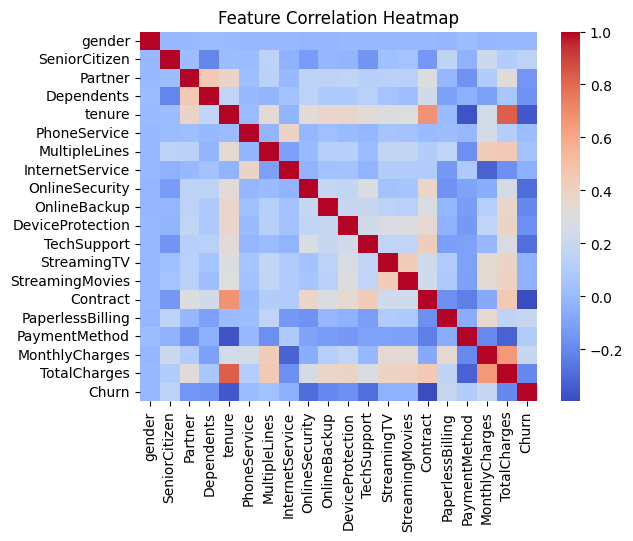

In [ ]:
# Program 2 - Customer Churn Prediction using Logistic Regression

# Step 1: Import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/archive (7).zip")
print("First 5 records:\n",df.head(5))

# Step 3: Clean the data
# Remove customerID (not useful for prediction)
df.drop("customerID",axis = 1,inplace = True)

# Convert TotalCharges to numeric (some values are empty)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.dropna(inplace = True)  # Drop rows with missing TotalCharges

# Step 4: Encode the categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
         df[column] = le.fit_transform(df[column])

# Step 5: Feature Selection
x = df.drop("Churn",axis = 1)  # Features
y = df["Churn"]  # Target variable

# Step 6: Split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,\
                                                 random_state = 42)

# Step 7: Train the Model
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

# Step 8: Make predictions
y_pred = model.predict(x_test)

# Step 9: Evaluate the model
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassificaion Report:\n",classification_report(y_test,y_pred))

# Step 10: Plot the correlation heatmap
sns.heatmap(df.corr(),annot = False,cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

First 5 rows:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbay

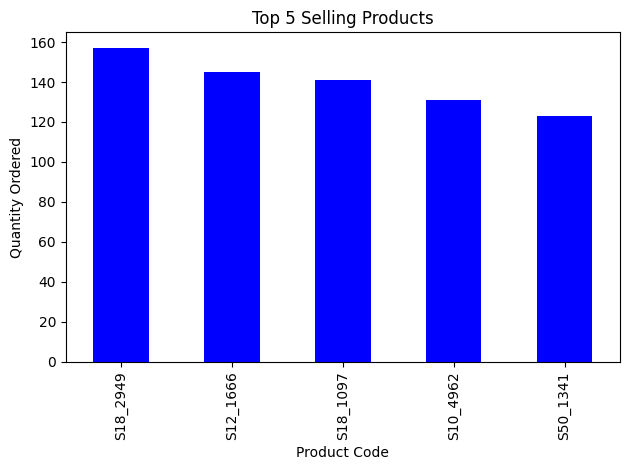

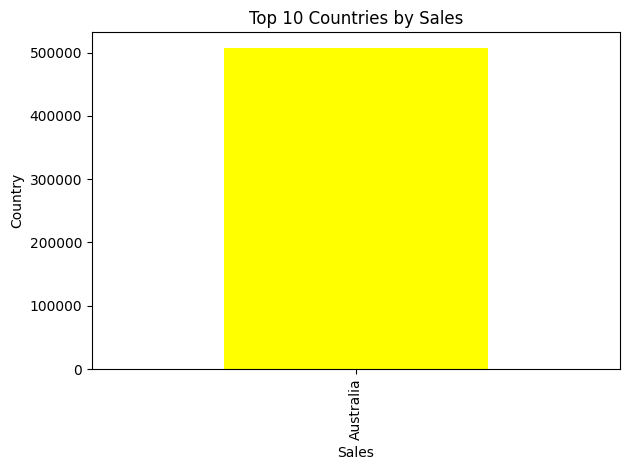

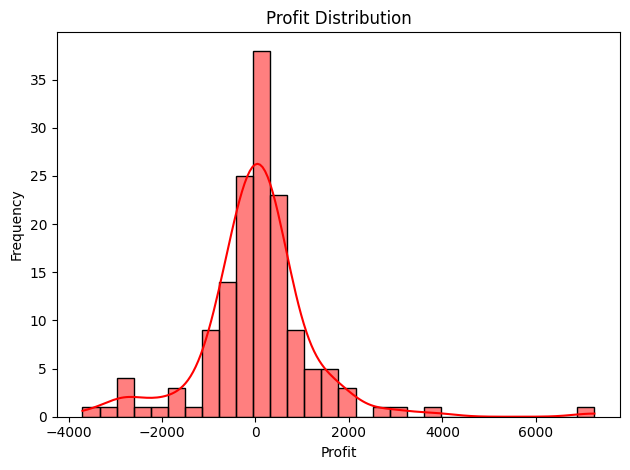

In [ ]:
# Program 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/archive (8).zip',encoding = 'latin-1')
print("First 5 rows:\n",df.head(5))

# Step 2: Basic information
print("\nDataset Information:")
print(df.info())

# Step 3: Clean the data (remove nulls,duplicates)
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

# Step 4: Create a Profit Column
df["Profit"] = df["SALES"] - (df["QUANTITYORDERED"] * df["MSRP"])

# Step 5: Total Sales and Total Profit
print("\nTotal Sales:",df['SALES'].sum())
print("\nTotal Profit:",df['Profit'].sum())

# Step 6: Top 5 selling products
top_products = df.groupby('PRODUCTCODE')["QUANTITYORDERED"].sum().sort_values(ascending = False).head(5)
print("\nTop 5 Selling Products:\n",top_products)

# Step 7: Sales by Country
country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending = False)

# Step 8: Visualization

# a. Top 5 Selling Products
top_products.plot(kind = 'bar',color = 'blue')
plt.title("Top 5 Selling Products")
plt.xlabel("Product Code")
plt.ylabel("Quantity Ordered")
plt.tight_layout()
plt.show()

# b. Sales by Country (Top 10)
country_sales.head(10).plot(kind = 'bar',color = 'yellow')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# c. Profit Distribution
sns.histplot(df['Profit'],kde = True,bins = 30,color = 'red')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.7717 - loss: 0.6289 - val_accuracy: 0.8767 - val_loss: 0.3530
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8884 - loss: 0.3056 - val_accuracy: 0.8967 - val_loss: 0.2892
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9041 - loss: 0.2551 - val_accuracy: 0.8999 - val_loss: 0.2692
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9227 - loss: 0.2085 - val_accuracy: 0.9045 - val_loss: 0.2611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 34ms/step - accuracy: 0.9299 - loss: 0.1885 - val_accuracy: 0.9011 - val_loss: 0.2627
313/313 - 3s - 8ms/step - accuracy: 0.9011 - loss: 0.2627
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


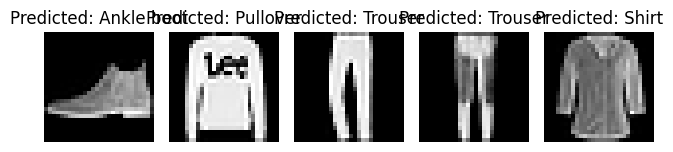

In [ ]:
# Program 4 - CNN for Image Classification using Fashion MNIST

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

# 1. Load the Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

# 2. Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Reshape input to add channel dimension
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# 4. Class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',\
               'Shirt','Sneaker','Bag','Ankle boot']

# 5. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

# 6. Compile the Model
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',\
              metrics = ['accuracy'])

# 7. Train the Model
model.fit(x_train,y_train,epochs = 5,validation_data = (x_test,y_test))

# 8. Evaluate the model
test_loss,test_acc = model.evaluate(x_test,y_test,verbose = 2)

# 9. Prediction
predictions = model.predict(x_test)

# Plot 5 test images with predicted labels
for i in range(5):
    plt.subplot(1,5,i + 1)
    plt.imshow(x_test[i].reshape(28,28),cmap = 'gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


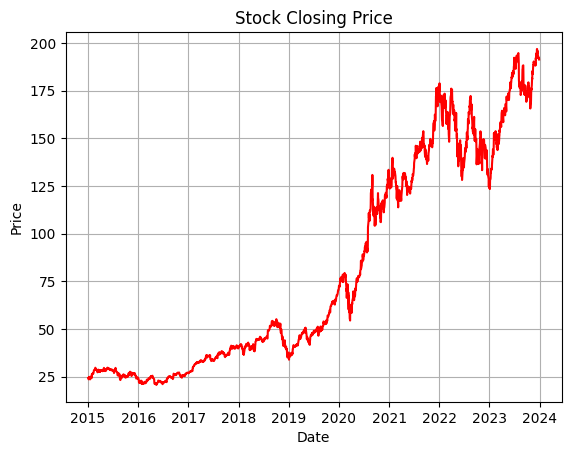

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0494
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 5.6905e-04
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 5.5166e-04
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 5.0773e-04
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 5.4340e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


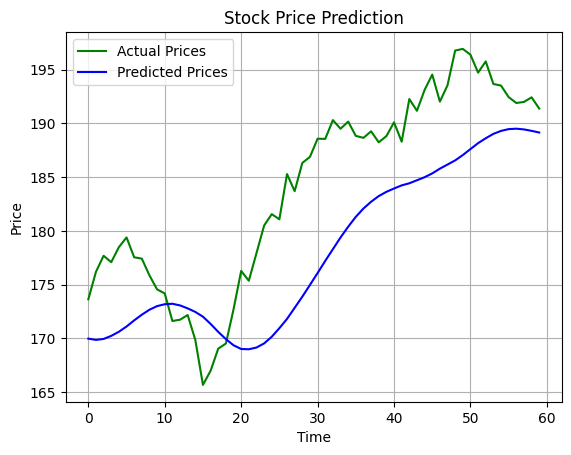

In [ ]:
# Program 5

# 1. Import the libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

# 2. Load the dataset (Using Apple as general example)
df = yf.download('AAPL',start = '2015-01-01',end = '2024-01-01')
df = df[['Close']]  # Use only the 'Close' price
df.dropna(inplace = True)

# 3. Visualize the Stock Price
plt.plot(df[['Close']],color = 'red')
plt.title("Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

# 4. Preprocessing
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(df)

# Create sequences of 60 days
x_train,y_train = [],[]
for i in range(60,len(scaled_data)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

# 5. Build the LSTM Model
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

# 6. Train the Model
model.fit(x_train,y_train,epochs = 5,batch_size = 32)

# 7. Prepare the test data
test_data = scaled_data[-120:]
x_test = []
for i in range(60,120):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# 8. Predict and Inverse Scale
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 9. Plot the predictions
actual_prices = df['Close'][-60:].values

plt.plot(actual_prices,label = 'Actual Prices',color = 'green')
plt.plot(predicted_prices,label = 'Predicted Prices',color = 'blue')
plt.title("Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Dataset shape: (284807, 31)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fradulent Transactions: 492
Non-Fradulent Transactions: 284315

Confusion Matrix:
 [[55423  1441]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


ROC AUC Score: 0.9714465520310545


<ipython-input-6-c44ddd6cc7c0>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--',color = 'black')


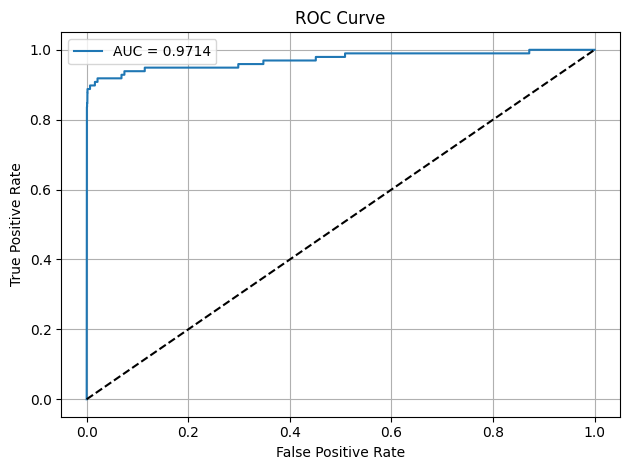

In [ ]:
# Program 6 - Credit Card Fraud Detection

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/archive (9).zip')

# 2. Basic Information
print("Dataset shape:",df.shape)
print("\nMissing Values:\n",df.isnull().sum())

# 3. Class Distribution
print("\nFradulent Transactions:",df[df['Class'] == 1].shape[0])
print("Non-Fradulent Transactions:",df[df['Class'] == 0].shape[0])

# 4. Data Preprocessing
x = df.drop(['Class','Time'],axis = 1)  # Removing Time as it is not useful
y = df['Class']

# Standardize 'Amount'
scaler = StandardScaler()
x['Amount'] = scaler.fit_transform(x['Amount'].values.reshape(-1,1))

# 5. Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,\
                                                 random_state = 42,stratify = y)

# 6. Train the Model using Logistic Regression
model = LogisticRegression(max_iter = 1000,class_weight = 'balanced')
model.fit(x_train,y_train)

# 7. Evaluate the Model (Predictions)
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

# 8. Evaluation of the metrices
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

roc_auc = roc_auc_score(y_test,y_prob)
print("\nROC AUC Score:",roc_auc)

# 9. Plot the ROC curve
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label = f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],'k--',color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()